# Take Home Exam

## Instructions:
* Make sure that you run all code cells that are included in this notebook.
* I will deduct points in **half-point steps** in the following cases:
    * Your code does not work.
    * You are not answering the question (Read carefully).
    * Your code is slow or inefficient.
    * You do not explain why you are doing what you are doing.
    * Clean **unnecessary** elements before submission.
    * **Check the rubric on Camino for this assignment!**
    
**The deadline is Saturday, February 10, 2018, 11:59PM**.

**I am not available on Saturday and have only limited access to my email. If you have questions or issues, make sure you adress them on Friday. **

## Overview

In [2]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [2]:
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
cd = pd.read_csv('complications.csv', dtype=str).rename(columns=lambda x: x.strip())

This dataset contains complications in U.S. hospitals. Each observation represents the number of complications and the 30-day death rate for a specific complication in a specific hospital.

The columns are as follows:

In [6]:
cd.columns

Index([u'Provider ID', u'Hospital Name', u'Address', u'City', u'ZIP Code',
       u'County Name', u'Phone Number', u'Year', u'Measure ID',
       u'Measure Name', u'Denominator', u'Score', u'Lower Estimate',
       u'Higher Estimate'],
      dtype='object')

| Column Name | Description|
|-------------|------------|
|Provider ID | Unique ID of the hospital |
|Hospital Name| Name of the hospital|
|Address| Address of the hospital|
|City| Name of the city the hospital is in |
|ZIP Code | Postal code of the hospital|
|County Name | Name of the county the hospital is in|
|Phone Number | Phone number of the hospital |
|Year | The year in which the complications were recorded|
|Measure ID | Code for the complication |
|Measure Name | Name of the complication|
|Denominator| Number of underlying medical procedures|
|Score | Estimate for number of serious complications |
|Lower Estimate | Lower boundary of score|
|Higher Estimate | Upper boundary of score|

A quick overview of the dataset:

In [5]:
cd.describe()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate
count,272788,272788,272788,272788,272788,272626,272788,272788,272788,272788,272788,272788,272788,272788
unique,4746,5119,4915,2874,4368,1526,5028,6,26,26,23771,6373,8690,11699
top,330090,MEMORIAL HOSPITAL,100 HOSPITAL DRIVE,CHICAGO,76104,LOS ANGELES,6104022273,2013,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,26.0,0.06,0.0,0.06
freq,89,710,378,1957,353,5421,178,58668,24942,24942,1435,2947,23907,2897


A sample of the dataset:

In [6]:
cd.sample(5, random_state=1234).head()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate
22678,050222,SHARP CHULA VISTA MEDICAL CENTER,751 MEDICAL CENTER COURT,CHULA VISTA,91911,SAN DIEGO,6195025800,2016,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,474.0,14.3000,12.1,16.8
22088,050191,ST MARY MEDICAL CENTER,1050 LINDEN AVE,LONG BEACH,90813,LOS ANGELES,5624919000,2012,PSI_14_POSTOP_DEHIS,A wound that splits open after surgery on the...,102.0,1.7800,0.0,3.64
111295,201309,MAYO REGIONAL HOSPITAL,897 WEST MAIN STREET,DOVER FOXCROFT,04426,PISCATAQUIS,2075644251,2014,MORT_30_STK,Death rate for stroke patients,43.0,14.1000,10.2,18.9
44865,100012,LEE MEMORIAL HOSPITAL,2776 CLEVELAND AVE,FORT MYERS,33901,LEE,2393321111,2012,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,971.0,10.6000,8.9,12.5
208974,390194,BLUE MOUNTAIN HOSPITAL-GNADEN HUETTEN CAMPUS,211 NORTH 12TH STREET,LEHIGHTON,18235,CARBON,6073771300,2016,MORT_30_STK,Death rate for stroke patients,72.0,15.7000,11.7,20.8


# Transform relevant columns

All columns in the dataset are of type `str` (to preserve the ZIP code information). For **five** columns, str is the wrong type. Change the columns and explain why you changed which column.

Below are the columns which can not possibly hold a str data type as all the values in the column will be numeric values. Hence can either have int or float type. 

1. Year
2. Denominator 
3. Score
4. Lower Estimate
5. Higher Estimate

Phone numbers can be of string type as it may contain additional characters suc as '+' or '-' etc.

With data type str, We can not perform certain arithmatic functions. And hence, I feel, the columns such as **Score**, **Denominator**, **Lower Estimate** and **Higher Estimate** should be converted to float64

In [15]:
cd['Year']=cd['Year'].astype('float', copy =False)

In [8]:
cd['Score']=cd['Score'].astype('float', copy =False)

In [9]:
cd['Denominator']=cd['Denominator'].astype('float', copy =False)

In [8]:
cd['Lower Estimate']=cd['Lower Estimate'].astype('float', copy =False)

In [9]:
cd['Higher Estimate']=cd['Higher Estimate'].astype('float', copy =False)

# Create a ratio between the score and the denominator

Create a new column in the dataset that contains the ratio value.

In [10]:
cd['Ratio']=cd['Score']/cd['Denominator']

# Create an overview of the ratio for deathly complications

0. **Be careful when you identify 'deathly' complications and make sure that you catch all of them.**
1. Create the overview (Make sure that the overview is understandable to everyone.)
2. Choose an appropriate measure to aggregate the data. **Ignore that the data is for multiple years**.
2. Sort with the highest ratio on top.

0. **Be careful when you identify 'deathly' complications and make sure that you catch all of them.**

**Assumption:** Here I am making assumption that the measure name containing 'Death','Mortality' and 'Deaths' will be considered under deathly complication as I am unsure to predict which of the rest complications may or may not result in deaths.

**Answer**: The below snippet catches the 'deathly' complications. The graphs show the Ratios of each deathly complications. The below graph shows that, 'PSI_4_SURG_COMP' surgery complications play a major role in deciding the number of patient's unfortunate deaths.

In [11]:
Deathly_Complications= cd[cd['Measure Name'].str.contains('Death')|cd['Measure Name'].str.contains('Mortality') |cd['Measure Name'].str.contains('Deaths')].groupby('Measure ID')
Deathly_Complications.mean()

,Denominator,Score,Lower Estimate,Higher Estimate,Ratio
Measure ID,,,,,
MORT_30_AMI,194.2223,14.2179,11.2517,17.7680,0.1599
MORT_30_CABG,131.9449,3.2707,1.7215,6.0919,0.0415
MORT_30_COPD,207.2742,7.9839,5.7509,10.9850,0.0833
MORT_30_HF,263.0745,11.9640,9.1096,15.5652,0.1217
MORT_30_PN,282.6111,13.9784,10.8605,17.8528,0.1159
MORT_30_STK,181.1602,14.9663,11.5444,19.1423,0.1848
PSI_4_SURG_COMP,153.6484,77.2856,82.9346,167.6537,0.5244


**2. Create the overview (Make sure that the overview is understandable to everyone.)**

**Answer: ** In order to make the data easy for everyone to understand, I feel its visual respresentation is the key.The below pie chart shows the deathly complications and their respective ratios. We can conclude that, the highest contribution of the deaths is because of **'PSI_4_SURG_COMP'** i.e.**'Surgery Complications** which is approimately **43%**

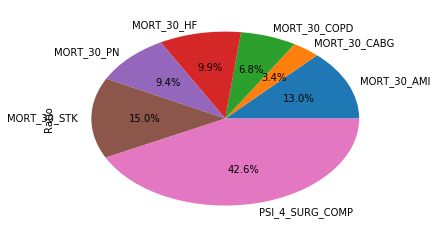

In [12]:
Deathly_Complications.mean().plot(kind='pie', y = 'Ratio',autopct='%1.1f%%',legend = False)

**3.Choose an appropriate measure to aggregate the data. Ignore that the data is for multiple years**.

I decided to aggregate the data over Hospital name, Its mean and count of cases.
Below code shows a random sample of 5 hospitals for showcase purpose.

In [12]:
cd.groupby('Hospital Name')['Ratio'].agg(['mean','count']).sample(5)

,mean,count
Hospital Name,,
TETON VALLEY HOSPITAL,0.3039,1
HARLINGEN MEDICAL CENTER,0.0656,86
ST FRANCIS HOSPITAL,0.1096,438
MARY HITCHCOCK MEMORIAL HOSPITAL,0.0363,89
CALDWELL MEMORIAL HOSPITAL,0.1101,97


**4. Sort with the highest ratio on top.**

In [11]:
cd.sort_values(['Ratio'], ascending=[False]).head(5)

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate,Ratio
168295,330236,NEW YORK METHODIST HOSPITAL,506 SIXTH STREET,BROOKLYN,11215,KINGS,7187803000,2014,PSI_4_SURG_COMP,Deaths among Patients with Serious Treatable C...,128.5000,128.4600,91.155,165.76,0.9997
80643,150002,METHODIST HOSPITALS INC,600 GRANT ST,GARY,46402,LAKE,2198864642,2012,PSI_4_SURG_COMP,Deaths among Patients with Serious Treatable C...,136.0000,135.8600,98.57,173.15,0.9990
186942,360145,UNIVERSITY HOSPITALS - ELYRIA MEDICAL CENTER,630 EAST RIVER STREET,ELYRIA,44035,LORAIN,4403297500,2012,PSI_4_SURG_COMP,Deaths among Patients with Serious Treatable C...,88.1000,88.0000,45.91,130.29,0.9989
69534,140015,BLESSING HOSPITAL,BROADWAY AT 11TH STREET,QUINCY,62301,ADAMS,2172235811,2013,PSI_4_SURG_COMP,Deaths among Patients with Serious Treatable C...,124.0000,123.8500,86.43,161.26999999999998,0.9988
54702,100243,BRANDON REGIONAL HOSPITAL,119 OAKFIELD DR,BRANDON,33511,HILLSBOROUGH,8136815551,2014,PSI_4_SURG_COMP,Deaths among Patients with Serious Treatable C...,107.1300,107.0000,64.695,149.565,0.9988


# Identify the five safest hospitals

Return a **list** with the hospitals that have, on average, the lowest rate of deadly complications. **Be careful when you identify 'deathly' complications.** (Again, ignore that the dataset covers multiple years).

Here, I have computed mean of the Ratio of the given data set where in data is grouped by Hospital names.

In [343]:
cd.groupby('Hospital Name')['Ratio'].mean().nsmallest(5)

Hospital Name
STRAITH HOSPITAL FOR SPECIAL SURGERY               0.0007
WINIFRED MASTERSON BURKE REHABILITATION HOSPITAL   0.0008
HELEN HAYES HOSPITAL                               0.0008
SUNNYVIEW HOSPITAL AND REHABILITATION CENTER       0.0009
GLENBEIGH HEALTH SOURCES                           0.0010
Name: Ratio, dtype: float64

# Augment the datset with information about the state

Read the file `geo-data.csv` into an object `zip_codes`. **Make sure that you read all columns as string.** ([Link](https://github.com/scpike/us-state-county-zip))

In [19]:
zip_codes= pd.read_csv('geo-data.csv', dtype=str).rename(columns=lambda x: x.strip())


This file contains information about the relationship of zip codes, counties, and U.S. states. 

In [20]:
zip_codes.columns

Index([u'state_fips', u'state', u'state_abbr', u'zipcode', u'county', u'city'], dtype='object')

| Column Name | Description|
|-------------|------------|
|state_fips | FIPS code for the state |
|state| Name of the state|
|state_abbr| Abbreviation of the state|
|zipcode | Postal code|
|county | County name|
|city | City name  |

1. Combine the dataset on complications with the dateset on zip codes.
2. Explain why you chose the column that used to combine the datasets.
3. **Do not worry, not all states will be matched.**

I have merged two datasets on the zip code column. As the other common column was the 'county' and 'city'. Since the 'cd data set' has all the county and city names in upper case, It is difficult to merge them with 'zip_codes dataset' (If I want to do so, first I will have to change the case for the entire series.)

In [30]:
Merged_Data =cd.merge(zip_codes, left_on=['ZIP Code'], right_on=['zipcode'], how='left')
Merged_Data.sample(5, random_state=1234).head()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,...,Score,Lower Estimate,Higher Estimate,Ratio,state_fips,state,state_abbr,zipcode,county,city
247242,460041,DAVIS HOSPITAL AND MEDICAL CENTER,1600 WEST ANTELOPE DRIVE,LAYTON,84041,DAVIS,8018071000,2011,READM_30_STK,Rate of unplanned readmission for stroke patients,...,13.4000,10.1,17.8,0.2481,49,Utah,UT,84041,Davis,Layton
265180,520070,MAYO CLINIC HEALTH SYSTEM EAU CLAIRE HOSPITAL,1221 WHIPPLE ST,EAU CLAIRE,54703,EAU CLAIRE,7158383311,2012,READM_30_PN,Pneumonia (PN) 30-Day Readmission Rate,...,17.3000,14.8,20.1,0.0447,55,Wisconsin,WI,54703,Eau Claire,Eau claire
151007,300017,PARKLAND MEDICAL CENTER,1 PARKLAND DRIVE,DERRY,03038,ROCKINGHAM,6034212100,2013,READM_30_AMI,Acute Myocardial Infarction (AMI) 30-Day Readm...,...,18.4000,15.4,21.8,0.1688,NaN,NaN,NaN,NaN,NaN,NaN
68179,130049,KOOTENAI MEDICAL CENTER,2003 KOOTENAI HEALTH WAY,COEUR D'ALENE,83814,KOOTENAI,2086254001,2012,PSI_15_ACC_LAC,Accidental cuts and tears from medical treatment,...,2.4200,1.53,3.31,0.0003,16,Idaho,ID,83814,Kootenai,Coeur d alene
8098,030061,BANNER BOSWELL MEDICAL CENTER,10401 WEST THUNDERBIRD BOULEVARD,SUN CITY,85351,MARICOPA,6239777211,2012,PSI_15_ACC_LAC,Accidental cuts and tears from medical treatment,...,1.2700,0.54,1.99,0.0001,4,Arizona,AZ,85351,Maricopa,Sun city


# Create an overview of the complications per U.S. state

* Return a sorted list with the overall complication rate per state. 
* Ignore that the data is for multiple years. 
* Focus on the **best** ten states.

**Assumption: ** Here I have assumed that, We need one entry per hospital and to get that, we need to ignore the data for multiple years.

Here, I tried to get those observations which have some or other complication codes attached to them. 
In order to ignore data for multiple years,  I have used drop duplicate function. Sorted the data set on years as every hospital has multiple year's data. To get best 10 hospitals, we would require just one entry of hospital.

In [168]:
Best_of_ten=Merged_Data[Merged_Data['Measure Name'].str.contains('complication')].groupby(Merged_Data['state'])
Best_of_ten.head().nsmallest(10, 'Year', keep='first').drop_duplicates()


,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,...,Score,Lower Estimate,Higher Estimate,Ratio,state_fips,state,state_abbr,zipcode,county,city
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,3347938701,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,3.7000,2.5,5.5,0.0104,1,Alabama,AL,36301,Houston,Taylor
175,010006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,35631,LAUDERDALE,2567688400,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,3.2000,2.1,4.8,0.0087,NaN,NaN,NaN,NaN,NaN,NaN
5665,020001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,99508,ANCHORAGE,9072613675,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,3.8000,2.5,5.6,0.0104,2,Alaska,AK,99508,Anchorage Borough,Anchorage
6453,030002,BANNER GOOD SAMARITAN MEDICAL CENTER,1111 EAST MCDOWELL ROAD,PHOENIX,85006,MARICOPA,6022392000,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,3.2000,2.1,4.7,0.0089,4,Arizona,AZ,85006,Maricopa,Phoenix
11119,040002,JOHNSON REGIONAL MEDICAL CENTER,1100 EAST POPLAR STREET,CLARKSVILLE,72830,JOHNSON,4797545454,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,3.5000,2.0,6.0,0.0897,5,Arkansas,AR,72830,Johnson,Clarksville
15082,050002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,94545,ALAMEDA,5107826200,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,3.4000,2.0,5.8,0.0420,6,California,CA,94545,Alameda,Hayward
36809,060001,NORTH COLORADO MEDICAL CENTER,1801 16TH STREET,GREELEY,80631,WELD,9703524121,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,5.3000,3.7,7.7,0.0183,8,Colorado,CO,80631,Weld,Garden city
43309,080003,ST FRANCIS HOSPITAL,7TH AND CLAYTON STS,WILMINGTON,19805,NEW CASTLE,3024214100,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,3.4000,2.0,5.8,0.1030,10,Delaware,DE,19805,New Castle,Wilmington
43390,080004,BAYHEALTH - KENT GENERAL HOSPITAL,640 S STATE STREET,DOVER,19901,KENT,3027447001,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,4.0000,2.8,5.7,0.0083,10,Delaware,DE,19901,Kent,Dover
43752,090001,GEORGE WASHINGTON UNIV HOSPITAL,900 23RD ST NW,WASHINGTON,20037,DISTRICT OF COLUMBIA,2027164605,2011,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,...,2.9000,1.7,4.8,0.0184,11,District of columbia,DC,20037,District of Columbia,Washington


# Create an overview of the change in complications across U.S. states

* Focus on the deadly complications only.
* Calculate the change as follows: **(average rate for last year in dataset - average rate for first year in dataset)/(average rate for first year in dataset)**

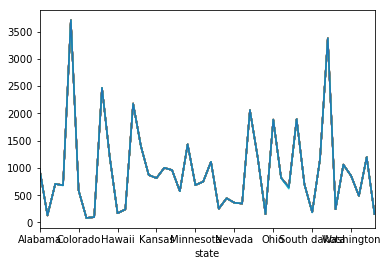

In [294]:
Deathly_Complications_By_state= Merged_Data[Merged_Data['Measure Name'].str.contains('Death')].groupby('state')
Deathly_Complications_By_state.count().plot(legend = False)


Which state has improved the most?

As per the rolling window,  **Texas** has impoved the most.

In [307]:
Deathly_Complications_By_state.rolling(2).mean()['Ratio'].groupby('state').pct_change().nlargest(1)

state        
Texas  271288   75.3372
Name: Ratio, dtype: float64

Which state has the worst development?

**Georgia** state shows worst development.

In [306]:
Deathly_Complications_By_state.rolling(2).mean()['Ratio'].groupby('state').pct_change().nsmallest(1)

state         
Georgia  62192   -0.9913
Name: Ratio, dtype: float64

# Bonus

Which state has the worst development for 'Deaths among Patients with Serious Treatable Complications after Surgery'?

In [372]:
Serious_treatable_complication=Merged_Data[Merged_Data['Measure Name'].str.contains('Deaths among Patients with Serious Treatable Complications after Surgery')]

In [375]:
Serious_treatable_complication.groupby('state')['Ratio'].mean().nsmallest(1)

state
Hawaii   0.4160
Name: Ratio, dtype: float64

**Hawaii** is the worst developed among the given type of complication.